In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch import fft

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


torch.Size([64, 1, 28, 28])
torch.Size([64])


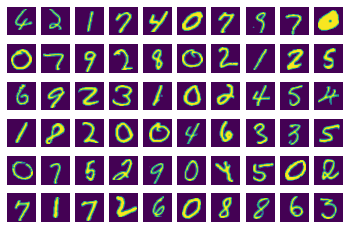

In [2]:
dataiter = iter(trainloader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze())


print(images.shape)
print(labels.shape)

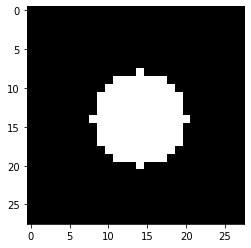

In [26]:

# img = torch.angle(fft.fftshift(fft.fft2(images[11],norm="forward")))
# img = torch.angle(fft.fftshift(fft.fft2(images[11],norm="forward")))
img = 128 * np.ones((28,28))

rows, cols = 28,28
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols), np.uint8)
r = 6
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

plt.imshow(mask, cmap='gray');
plt.savefig('four.jpg')

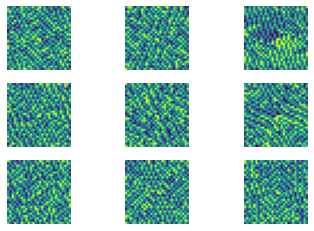

In [4]:
figure = plt.figure()
num_of_images = 9
X = np.angle((xv-14)*1j+(yv-14))
for index in range(1, num_of_images + 1):
    img = torch.angle(fft.fftshift(fft.fft2(images[index],norm="forward")))
    plt.subplot(3, 3, index)
    plt.axis('off')
    plt.imshow(img.numpy().squeeze())

plt

In [33]:
#!/usr/bin/env python
import cv2



img = mask
# img2 = cv2.logPolar(img, (img.shape[0]/2, img.shape[1]/2), 40, cv2.WARP_FILL_OUTLIERS)
img3 = cv2.linearPolar(img, (img.shape[0]/2, img.shape[1]/2), 40, cv2.WARP_FILL_OUTLIERS)

cv2.imwrite('four1.jpg',img2)

cv2.imwrite('four3.jpg',img3)

# cv2.imshow('before', img)
# cv2.imshow('logpolar', img2)
# cv2.imshow('linearpolar', img3)

# cv2.waitKey(0)

True

In [73]:
# xv, yv = np.meshgrid(range(rows), range(cols))
# X = np.angle((xv-14)*1j+(yv-14))
# print()

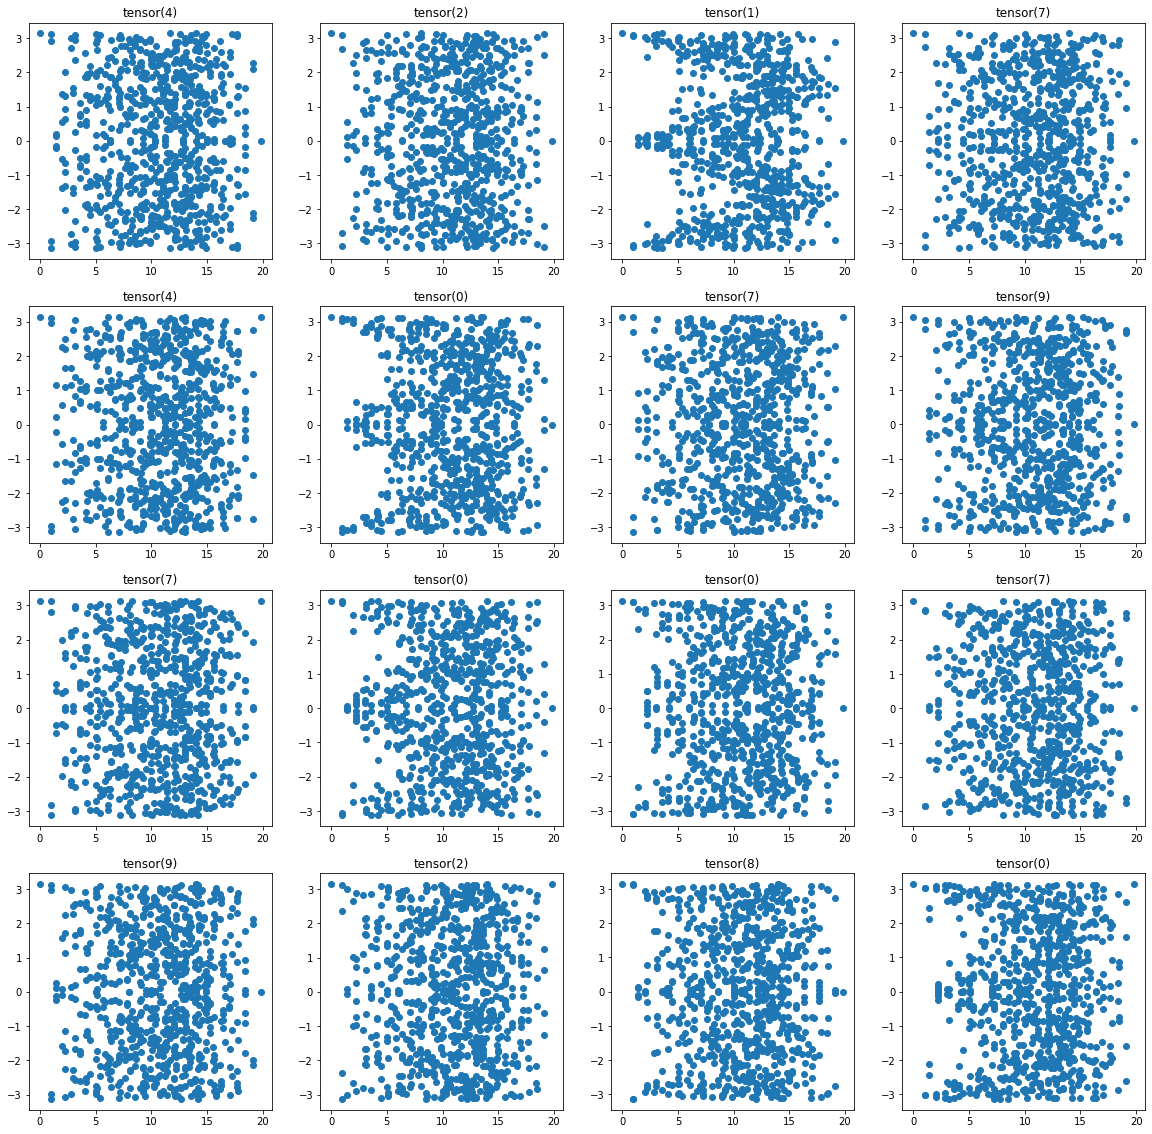

In [135]:
plt.rcParams["figure.figsize"] = (20,20)
num_of_images = 16
for index in range(1, num_of_images + 1):
    plt.subplot(4, 4, index)
    img = images[index].numpy().squeeze()
    rows, cols = img.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    xv, yv = np.meshgrid(range(rows), range(cols))
    coord_ang = np.abs((xv-crow)*1j+(yv-ccol)).flatten()
    img_ang = torch.angle(fft.fftshift(fft.fft2(torch.from_numpy(img),norm="forward"))).numpy().squeeze().flatten()
    plt.scatter(coord_ang,img_ang)
    plt.title(labels[index])


plt.savefig('test.png')


In [108]:
img_ang

array([1.52061274e-03, 1.72912038e-03, 7.81067647e-04, 2.57513626e-03,
       2.93584820e-03, 4.78136679e-03, 5.32231154e-03, 2.29177019e-03,
       4.71080333e-04, 9.31629678e-04, 1.00538577e-03, 3.08405538e-03,
       4.06064466e-03, 4.51454567e-03, 4.68185544e-03, 4.51453868e-03,
       4.06064279e-03, 3.08405561e-03, 1.00538577e-03, 9.31629504e-04,
       4.71078791e-04, 2.29177019e-03, 5.32231061e-03, 4.78136586e-03,
       2.93584913e-03, 2.57513742e-03, 7.81067938e-04, 1.72911992e-03,
       3.52634420e-03, 3.53754638e-03, 3.00341542e-03, 3.13155120e-03,
       6.00175699e-03, 5.56420023e-03, 6.40966278e-03, 3.47527326e-03,
       2.61063431e-03, 4.88920603e-03, 4.66316333e-03, 4.11094306e-03,
       3.31429043e-03, 2.47451430e-03, 3.08429217e-03, 3.77601525e-03,
       3.41747003e-03, 2.70192465e-03, 2.19901139e-03, 2.27174186e-03,
       3.78261856e-03, 5.14815655e-03, 4.73529333e-03, 3.96113750e-03,
       4.80257528e-04, 4.29197121e-03, 3.21388640e-03, 2.09696381e-03,
      

In [85]:
1.57079633*2

3.14159266